<a href="https://colab.research.google.com/github/victoriamaccari/proyecto/blob/master/GrowthDJ_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preproceso de datos






#####carga de datos



In [109]:
import pandas as pd

In [110]:
url= "https://raw.githubusercontent.com/victoriamaccari/proyecto/master/GrowthDJ.csv"

In [111]:
df= pd.read_csv(url)

In [112]:
df.head(10)

,Unnamed: 0,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60
0,1,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0
1,2,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0
2,3,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0
3,4,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,NaN
4,5,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0
5,6,no,no,no,755.0,663.0,1.2,1.7,5.1,0.4,14.0
6,7,no,yes,no,889.0,2190.0,5.7,2.1,12.8,3.4,19.0
7,8,no,no,no,838.0,789.0,1.5,1.7,10.5,1.4,7.0
8,9,no,no,no,908.0,462.0,-0.9,1.9,6.9,0.4,6.0
9,10,no,no,no,1009.0,2624.0,6.2,2.4,28.8,3.8,16.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  121 non-null    int64  
 1   oil         121 non-null    object 
 2   inter       121 non-null    object 
 3   oecd        121 non-null    object 
 4   gdp60       116 non-null    float64
 5   gdp85       108 non-null    float64
 6   gdpgrowth   117 non-null    float64
 7   popgrowth   107 non-null    float64
 8   invest      121 non-null    float64
 9   school      118 non-null    float64
 10  literacy60  103 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 10.5+ KB


In [114]:
#elimino columna Unnamed:0
df.drop(df.columns[[0]], axis='columns', inplace=True)

In [115]:
df.head(10)

,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60
0,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0
1,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0
2,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0
3,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,NaN
4,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0
5,no,no,no,755.0,663.0,1.2,1.7,5.1,0.4,14.0
6,no,yes,no,889.0,2190.0,5.7,2.1,12.8,3.4,19.0
7,no,no,no,838.0,789.0,1.5,1.7,10.5,1.4,7.0
8,no,no,no,908.0,462.0,-0.9,1.9,6.9,0.4,6.0
9,no,no,no,1009.0,2624.0,6.2,2.4,28.8,3.8,16.0


In [116]:
print(df['gdp60'].describe())


count      116.000000
mean      3681.818966
std       7492.877637
min        383.000000
25%        973.250000
50%       1962.000000
75%       4274.500000
max      77881.000000
Name: gdp60, dtype: float64


#####Valores perdidos

In [117]:
#Comprobar si hay valores perdidos
pd.isnull(df).any()



oil           False
inter         False
oecd          False
gdp60          True
gdp85          True
gdpgrowth      True
popgrowth      True
invest        False
school         True
literacy60     True
dtype: bool

In [118]:
#Total de valores perdidos por columna
df.isnull().sum()

oil            0
inter          0
oecd           0
gdp60          5
gdp85         13
gdpgrowth      4
popgrowth     14
invest         0
school         3
literacy60    18
dtype: int64

In [119]:
#Metodo fillna, asigna el valor previo o el ultimo valor valido
df.fillna(method='ffill', inplace=True)

In [120]:
#Compruebo que no queden valores perdidos
pd.isnull(df).any()

oil           False
inter         False
oecd          False
gdp60         False
gdp85         False
gdpgrowth     False
popgrowth     False
invest        False
school        False
literacy60    False
dtype: bool

In [121]:
#Comprobar si hay valores duplicados, filtro para que me muestre True si hay duplicados
df.duplicated(keep=False)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [122]:
#Observo los datos
import matplotlib.pyplot as plt


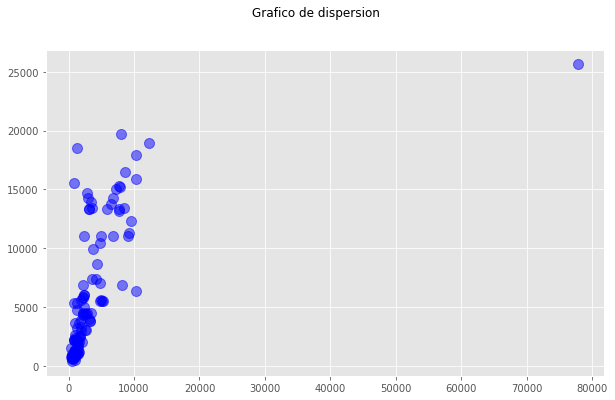

In [123]:
fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('Grafico de dispersion')

ax.scatter(df['gdp60'], df['gdp85'],
            color="blue",    # Color of the dots
            s=100,           # Size of the dots
            alpha=0.5,       # Alpha/transparency of the dots (1 is opaque, 0 is transparent)
            linewidths=1)    # Size of edge around the dots

# Show the plot
plt.show()

In [124]:
summary = df.describe()
print(summary)

              gdp60         gdp85   gdpgrowth   popgrowth      invest  \
count    121.000000    121.000000  121.000000  121.000000  121.000000   
mean    3587.983471   5857.661157    4.104132    2.231405   18.157025   
std     7349.898268   5600.090048    1.908376    1.016615    7.853310   
min      383.000000    412.000000   -0.900000    0.300000    4.100000   
25%      978.000000   1237.000000    2.700000    1.600000   12.000000   
50%     1939.000000   3775.000000    3.900000    2.400000   17.700000   
75%     3766.000000   9903.000000    5.400000    2.900000   24.100000   
max    77881.000000  25635.000000    9.200000    6.800000   36.900000   

           school  literacy60  
count  121.000000  121.000000  
mean     5.537190   48.256198  
std      3.502693   35.646302  
min      0.400000    1.000000  
25%      2.400000   15.000000  
50%      4.900000   39.000000  
75%      8.200000   84.000000  
max     12.100000  100.000000  


(array([ 1.,  5., 14., 16., 30., 21., 17., 10.,  4.,  3.]),
 array([-0.9 ,  0.11,  1.12,  2.13,  3.14,  4.15,  5.16,  6.17,  7.18,
         8.19,  9.2 ]),
 <a list of 10 Patch objects>)

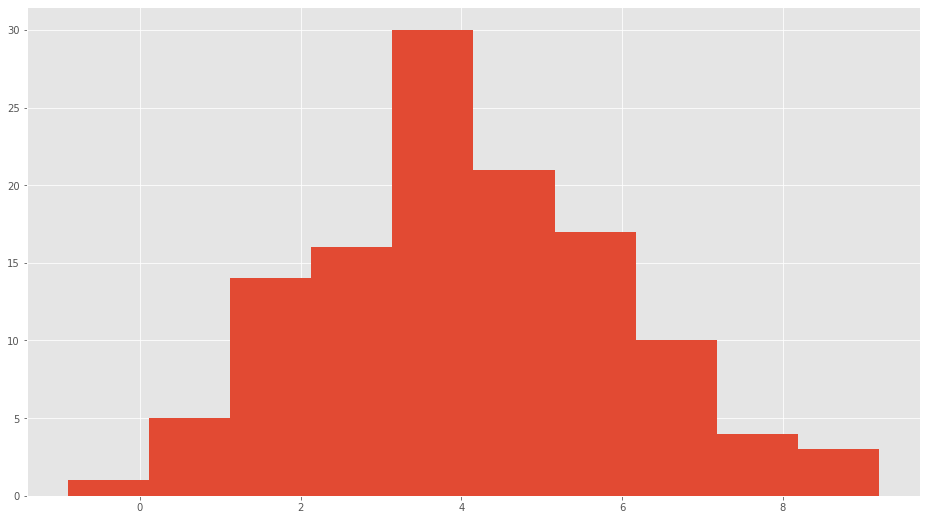

In [125]:
plt.hist(df["gdpgrowth"])

{'boxes': [<matplotlib.lines.Line2D at 0x7fa86d1e6da0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa86d1f67f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa86d1fd2b0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa86d1f6ef0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa86d1f60f0>,
  <matplotlib.lines.Line2D at 0x7fa86d1f6470>]}

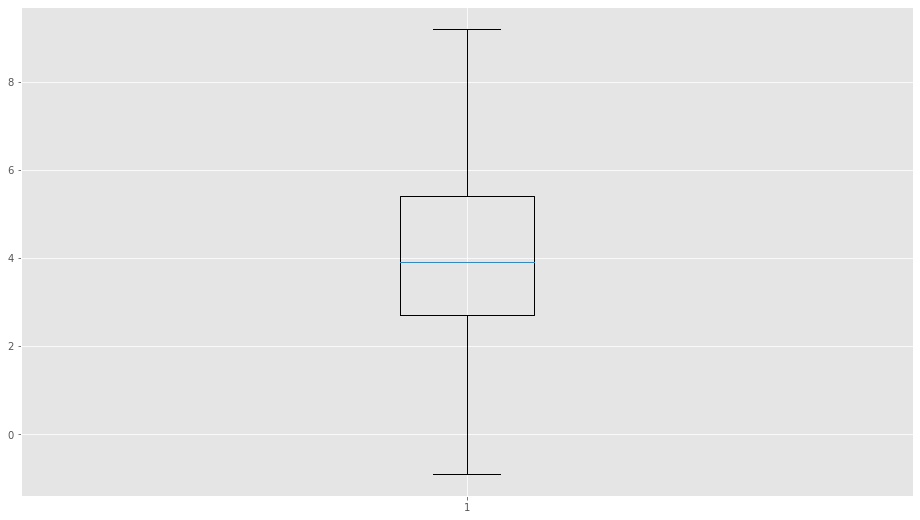

In [126]:
plt.boxplot(df['gdpgrowth'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fa86d37f160>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa86d32dc88>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa86d353ac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa86d32def0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa86d33fba8>,
  <matplotlib.lines.Line2D at 0x7fa86d33fb00>]}

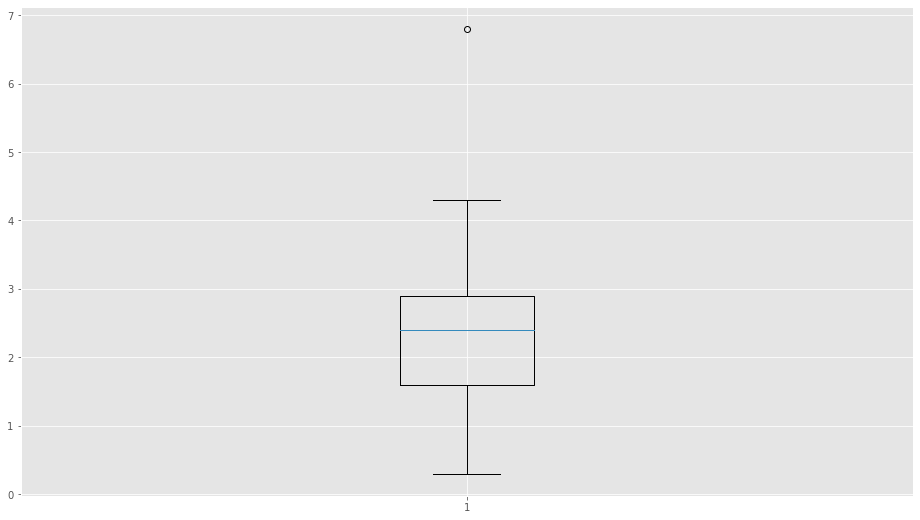

In [127]:
plt.boxplot(df['popgrowth'])

##### Deteccion de outliers

In [128]:
#Deteccion de outliers
#IQR para cada columna
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

gdp60         2788.0
gdp85         8666.0
gdpgrowth        2.7
popgrowth        1.3
invest          12.1
school           5.8
literacy60      69.0
dtype: float64


In [129]:
BI=(df < (Q1 - 1.5 * IQR)) 
print(BI)

     gdp60  gdp85  gdpgrowth  inter  invest  literacy60   oecd    oil  \
0    False  False      False  False   False       False  False  False   
1    False  False      False  False   False       False  False  False   
2    False  False      False  False   False       False  False  False   
3    False  False      False  False   False       False  False  False   
4    False  False      False  False   False       False  False  False   
5    False  False      False  False   False       False  False  False   
6    False  False      False  False   False       False  False  False   
7    False  False      False  False   False       False  False  False   
8    False  False      False  False   False       False  False  False   
9    False  False      False  False   False       False  False  False   
10   False  False      False  False   False       False  False  False   
11   False  False      False  False   False       False  False  False   
12   False  False      False  False   False       F

In [130]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
BS=(df > (Q3 + 1.5 * IQR))
print(BS)

     gdp60  gdp85  gdpgrowth  inter  invest  literacy60   oecd    oil  \
0    False  False      False  False   False       False  False  False   
1    False  False      False  False   False       False  False  False   
2    False  False      False  False   False       False  False  False   
3    False  False      False  False   False       False  False  False   
4    False  False      False  False   False       False  False  False   
5    False  False      False  False   False       False  False  False   
6    False  False      False  False   False       False  False  False   
7    False  False      False  False   False       False  False  False   
8    False  False      False  False   False       False  False  False   
9    False  False      False  False   False       False  False  False   
10   False  False      False  False   False       False  False  False   
11   False  False      False  False   False       False  False  False   
12   False  False      False  False   False       F

In [131]:
#Quito los outliers
df_out = df[~((df < (Q1 - 1.5 * IQR))).any(axis=1)]
df_out.shape

(121, 10)

In [132]:
#Quito los outliers
df_out2 = df[~((df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out2.shape

(110, 10)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa86d3f4fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa86d42aa58>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa86d488908>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa86d488208>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa86d42aeb8>,
  <matplotlib.lines.Line2D at 0x7fa86d42a358>]}

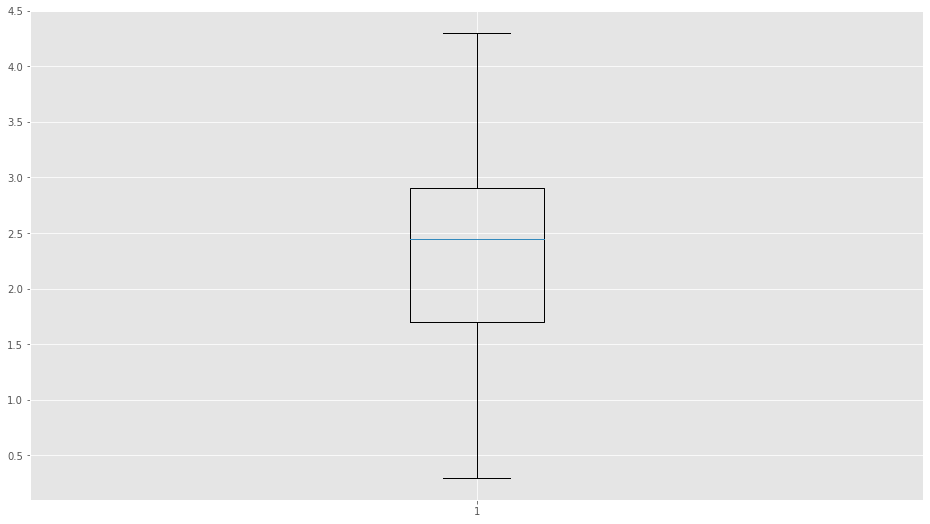

In [133]:
#Compruebo que en esta columna ya no hay valores outliers
plt.boxplot(df_out2['popgrowth'])

In [134]:
#Se eliminaron 11 filas con valores outliers
summary = df_out2.describe()
print(summary)

             gdp60         gdp85   gdpgrowth   popgrowth      invest  \
count   110.000000    110.000000  110.000000  110.000000  110.000000   
mean   2364.263636   5023.263636    4.211818    2.250909   17.682727   
std    1963.342356   4890.696790    1.958268    0.908143    7.793209   
min     383.000000    412.000000   -0.900000    0.300000    4.100000   
25%     917.000000   1193.750000    2.825000    1.700000   12.000000   
50%    1620.500000   3150.000000    4.050000    2.450000   17.150000   
75%    3145.000000   6042.000000    5.500000    2.900000   23.350000   
max    7938.000000  19723.000000    9.200000    4.300000   36.900000   

           school  literacy60  
count  110.000000  110.000000  
mean     5.179091   44.272727  
std      3.393007   34.556405  
min      0.400000    1.000000  
25%      2.325000   13.250000  
50%      4.450000   32.000000  
75%      7.975000   74.500000  
max     12.100000  100.000000  


In [135]:
#Bucle para eliminar valores outliers, no funciono falta modificar el exclude
def boxplot_outlier_removal(df):
  for col in df.columns:
        if col not in exclude:
            # get Q1, Q3 & Interquantile Range
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            # define outliers and remove them
            filter_ = (df[col] > Q1 - 1.5 * IQR) & (df[col] < Q3 + 1.5 *IQR)
            df = df[filter_]
  after = len(df)
  diff = before-after
  percent = diff/before*100
  print('{} ({:.2f}%) outliers removed'.format(diff, percent))
  return df


In [136]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#scaled_datos=scaler.fit_transform(df_out2.iloc[:,[3,4,5,6,7,8,9]].values)
#print(scaled_datos)


In [137]:
#normalizacion
#from sklearn import preprocessing
#data = df_out2.iloc[:,[3,4,5,6,7,8,9]].values #normalizar antes de seguir
#datanorm = (data-data.min())/(data.max()-data.min())
#print(datanorm)



#####Normalizacion de datos

In [138]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
datanorm = min_max_scaler.fit_transform(df_out2.iloc[:,[3,4,5,6,7,8]].values)
print(datanorm)

[[0.27822634 0.20501269 0.56435644 0.575      0.6097561  0.35042735]
 [0.15949702 0.03930402 0.16831683 0.45       0.05182927 0.11965812]
 [0.09702184 0.03412563 0.30693069 0.525      0.20426829 0.11965812]
 [0.0762409  0.16876392 0.94059406 0.725      0.73780488 0.21367521]
 [0.01932495 0.02304386 0.37623762 0.15       0.26219512 0.        ]
 [0.04923891 0.01299777 0.20792079 0.35       0.0304878  0.        ]
 [0.06697551 0.09207188 0.65346535 0.45       0.2652439  0.25641026]
 [0.06022502 0.01952255 0.23762376 0.35       0.19512195 0.08547009]
 [0.0694904  0.0025892  0.         0.4        0.08536585 0.        ]
 [0.08285903 0.11454611 0.7029703  0.525      0.75304878 0.29059829]
 [0.06935804 0.09051836 0.68316832 0.55       0.37195122 0.56410256]
 [0.0198544  0.01014966 0.36633663 0.5        0.03963415 0.05982906]
 [0.12230311 0.25570918 0.78217822 0.275      0.54878049 0.18803419]
 [0.05506287 0.25570918 0.44554455 0.275      0.42682927 0.09401709]
 [0.08285903 0.01631195 0.18811881

# Dendrograma

In [139]:
#algortimo aglomerativo jerarquico - dendrogramas
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

#datos=df_out2.iloc[:,[3,4,5,6,7,8]].values
#datos


In [140]:
clustering_jerarquico= sch.linkage(datanorm, 'ward')

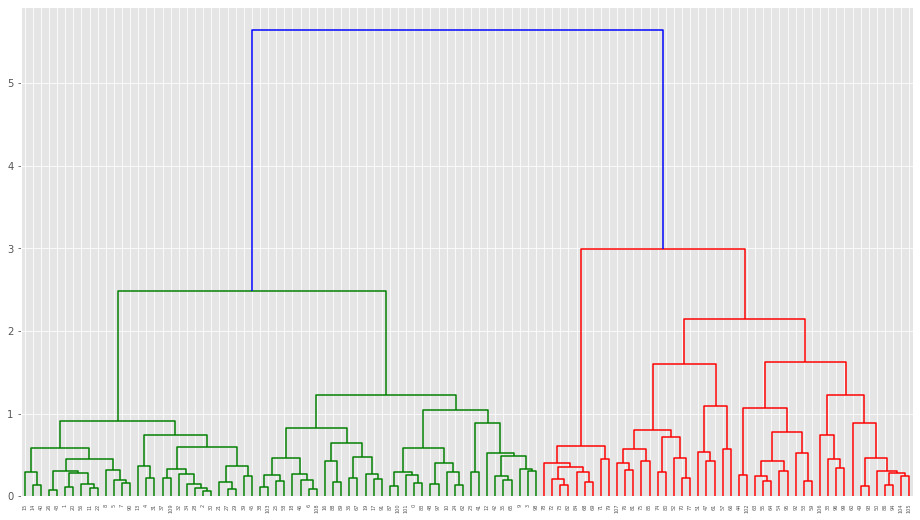

In [141]:
dendrogram=sch.dendrogram(clustering_jerarquico)

In [142]:
#realizo el corte en 2
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(clustering_jerarquico, t=2, criterion='distance')

In [143]:
print(clusters)

[2 1 1 2 1 1 2 1 1 2 2 1 2 1 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1 1 1 1 1 5 1 2 2
 1 2 1 1 2 2 1 5 1 2 4 2 5 5 4 4 5 5 5 1 4 2 5 5 4 2 5 5 2 4 2 3 3 4 3 3 3
 4 4 4 4 3 3 4 4 3 2 3 4 5 2 2 2 1 2 5 5 5 5 5 2 2 5 2 2 5 2 5 5 5 4 2 1]


In [144]:
df_out2['clustering jerarquico']=clusters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#####Nueva columna con datos etiquetados

In [145]:
#Visualizar las filas que estan en cada cluster
df_out2[df_out2['clustering jerarquico'] == 5]

,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60,clustering jerarquico
33,no,yes,no,4768.0,7064.0,3.9,2.3,21.6,3.0,57.0,5
44,yes,no,no,1224.0,2107.0,1.6,2.8,30.0,12.1,8.0,5
49,yes,no,no,3606.0,7400.0,6.3,3.4,18.4,6.5,16.0,5
50,yes,no,no,4916.0,5626.0,3.8,3.2,16.2,7.4,18.0,5
53,no,yes,no,2183.0,4312.0,5.4,2.7,17.6,10.8,32.0,5
54,no,yes,no,1285.0,4775.0,7.9,2.7,22.3,10.2,71.0,5
56,no,yes,no,2154.0,5788.0,7.1,3.2,23.2,7.3,53.0,5
60,no,yes,no,1668.0,2430.0,4.5,3.0,14.9,10.6,72.0,5
61,yes,no,no,6731.0,11057.0,6.1,4.1,12.8,3.1,3.0,5
64,no,yes,no,2382.0,6042.0,6.7,3.0,15.9,8.8,30.0,5


In [146]:
#Visualizo la nueva columna 'clustering jerarquico' con los datos etiquetados.
df_out2.head(10)

,oil,inter,oecd,gdp60,gdp85,gdpgrowth,popgrowth,invest,school,literacy60,clustering jerarquico
0,no,yes,no,2485.0,4371.0,4.8,2.6,24.1,4.5,10.0,2
1,no,no,no,1588.0,1171.0,0.8,2.1,5.8,1.8,5.0,1
2,no,no,no,1116.0,1071.0,2.2,2.4,10.8,1.8,5.0,1
3,no,yes,no,959.0,3671.0,8.6,3.2,28.3,2.9,5.0,2
4,no,no,no,529.0,857.0,2.9,0.9,12.7,0.4,2.0,1
5,no,no,no,755.0,663.0,1.2,1.7,5.1,0.4,14.0,1
6,no,yes,no,889.0,2190.0,5.7,2.1,12.8,3.4,19.0,2
7,no,no,no,838.0,789.0,1.5,1.7,10.5,1.4,7.0,1
8,no,no,no,908.0,462.0,-0.9,1.9,6.9,0.4,6.0,1
9,no,no,no,1009.0,2624.0,6.2,2.4,28.8,3.8,16.0,2


#####Coeficiente de Silhouette

In [147]:
from sklearn import metrics
n_clusters_ = len(set(clusters))
print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, clusters))

Estimated number of clusters: 5
Silhouette Coefficient: 0.235


# PCA ANALISIS DE COMPONENTES PRINCIPALES

In [148]:
#PCA ANALISIS DE COMPONENTES PRINCIPALES
from sklearn import preprocessing 
scaler = preprocessing.StandardScaler()
states = scaler.fit_transform(df_out2.iloc[:,[3,4,5,6,7,8]].values)

In [149]:
#2. PCA Estimation
from sklearn.decomposition import PCA
estimator = PCA (n_components = 3)
X_pca = estimator.fit_transform(states)
X_pca

array([[ 0.18268288, -0.60466336, -0.07249485],
       [-1.97837542,  1.75981653,  0.37832512],
       [-1.78740718,  0.83158197,  0.08547769],
       [-0.10047898, -2.69468232, -0.99274523],
       [-1.49789826,  1.43561608, -1.54096422],
       [-2.30292825,  1.8275464 , -0.32175059],
       [-1.00317344, -0.44944139, -0.7832484 ],
       [-1.79277435,  1.53462763, -0.40859671],
       [-2.42068406,  2.47041385,  0.2353235 ],
       [ 0.00726887, -1.30011712, -1.03338699],
       [-0.40725888, -1.02243019, -0.24529804],
       [-2.30453498,  0.77783912, -0.1617904 ],
       [ 0.18840634, -0.7030959 , -1.84555627],
       [-0.6017639 ,  0.69436314, -1.28424728],
       [-1.62091693,  1.31110574,  0.58250568],
       [-1.24253966,  1.21379932, -0.30510219],
       [-1.85316346, -1.52132913,  1.0356915 ],
       [-1.432827  , -1.03300861,  0.17636942],
       [-1.23380569, -0.7508146 , -1.39957795],
       [-1.23790374, -0.33544524,  0.04664924],
       [-1.88938655,  1.3606277 ,  0.297

In [150]:
print(estimator.explained_variance_ratio_) 

[0.52737763 0.22211364 0.09310427]


# K-MEANS

In [151]:
#k-means

# parameters
init = 'random' # initialization method 

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

In [152]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

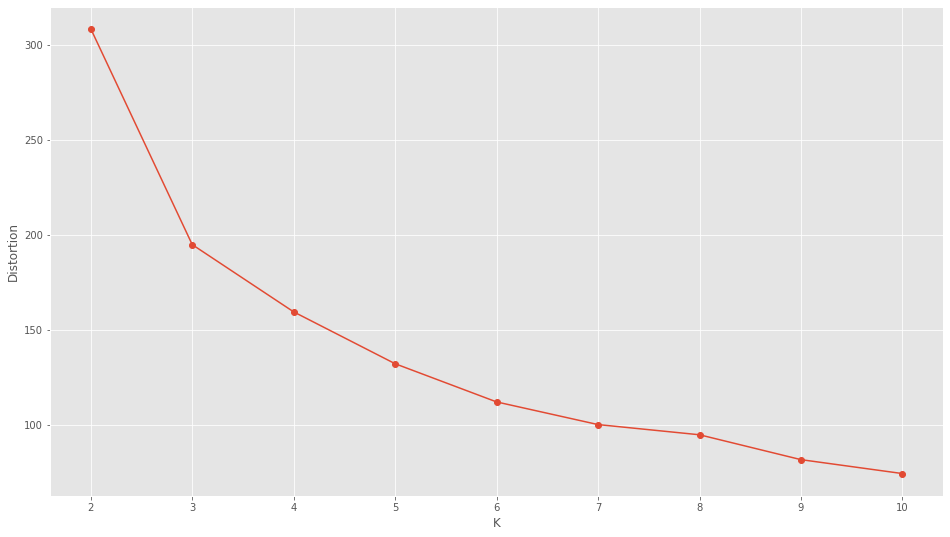

In [153]:
plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

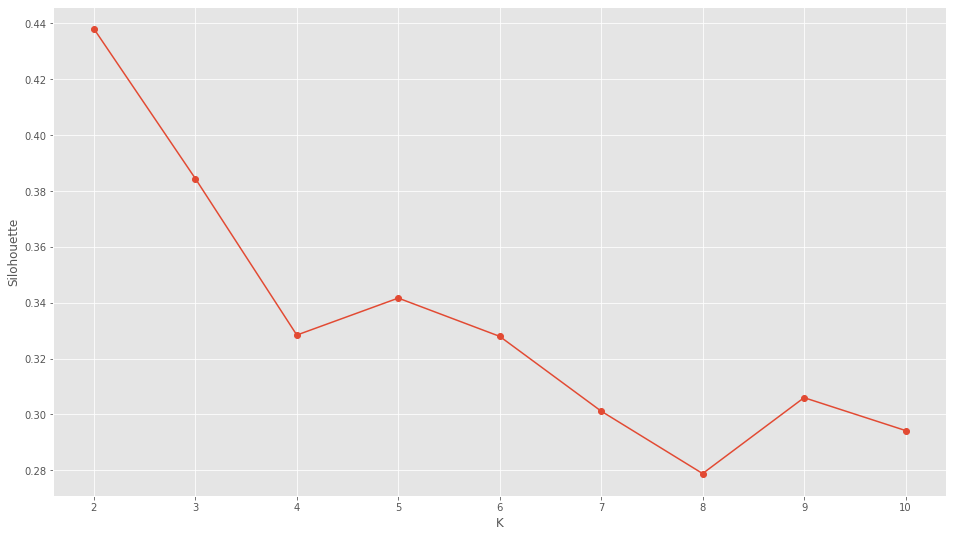

In [154]:
plt.plot(range(2,11), silhouettes , marker='o')
plt.xlabel('K')
plt.ylabel('Silohouette')
plt.show()

In [155]:
k = 4

km = KMeans(k, init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

In [156]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(datanorm, y_km))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.229
Distortion: 159.37


In [157]:
km.labels_

array([1, 3, 3, 1, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0,
       3, 0, 1, 0, 3, 0, 3, 0, 3, 3, 3, 1, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3,
       1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 3, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       0, 0, 3, 0, 2, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 0, 0],
      dtype=int32)

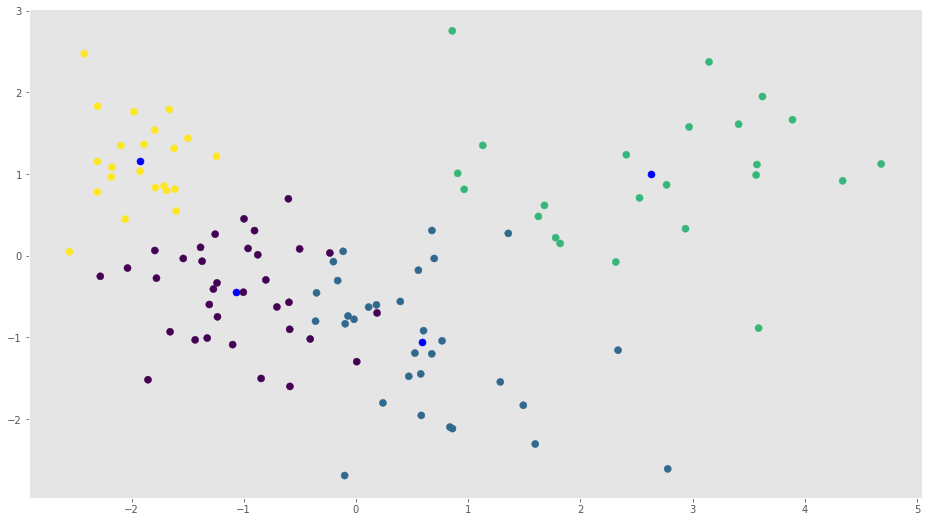

In [158]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=km.labels_,s=50)
# plotting centroids
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='blue',s=50)
# 
plt.grid()
plt.show()

# Regresion lineal simple

In [159]:
#Regresion lineal
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [160]:
x_train=(df_out2['gdp60']).values.reshape(-1,1)
y_train=(df_out2['literacy60']).values.reshape(-1,1)
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(x_train, y_train)
y_pred = regr.predict(x_train)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

#https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/

Coefficients: 
 [[0.01251093]]
Independent term: 
 [14.69357939]
Mean squared error: 585.42
Variance score: 0.51


In [161]:
#el coeficiente m es la pendiente 0.01251093
#la ordenada al origen es 14.69
#el error cuadratico es 585.42
#la varianza es 0.51 


In [162]:
x=df_out2['gdp60'].values.reshape(-1,1)
y=df_out2['literacy60'].values.reshape(-1,1)
linear_regressor=LinearRegression()
linear_regressor.fit(x,y)
x_pred=linear_regressor.predict(x)


In [163]:
#ecuacion
import matplotlib.pyplot as plt

m = linear_regressor.coef_[0][0]
c = linear_regressor.intercept_[0]
label = r'$y = %0.4f*x  %+0.4f$'%(m,c)
print(label)

$y = 0.0125*x  +14.6936$


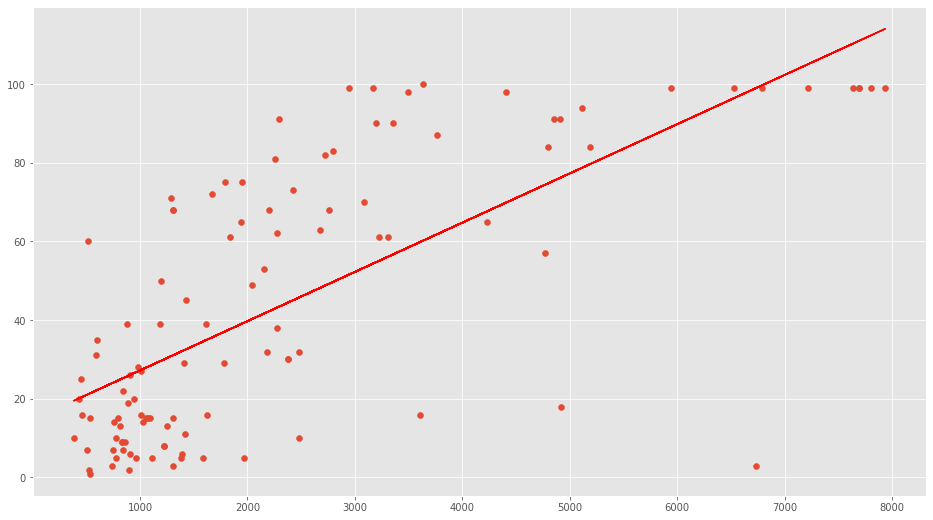

In [164]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred, color='red')
plt.show()


In [165]:
#prediccion, si el PBI aumenta a 10.000 el porcentaje que sabe leer y escribir aumenta a 139%
y_Diezmil = regr.predict([[10000]])
print(int(y_Diezmil))

139


In [166]:
#Regresion lineal NO ME SALIO CON LA BASE DE DATOS NORMALIZADA
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
import matplotlib as plt
plt.scatter(datanorm[:,1],datanorm[:,3])


AttributeError: ignored

In [ ]:
plt.scatter(datanorm[:,1],datanorm[:,3]
#fig = plt.figure(figsize=(14,14))
#plt.plot(df_out2['gdp60'],df_out2['literacy60'])
#plt.xlabel('PBI en 1960')
#plt.ylabel('personas que saben leer y escribir en 1960')


# Regresion lineal multiple

In [167]:
#datax2=(df_out2['school']).values.reshape(-1,1), (df_out2['gdp60']).values.reshape(-1,1)
#datax2=(df_out2['gdp60']).values.reshape(-1,1)
xy_train=X_pca
z_train = df_out2['literacy60'].values.reshape(-1,1)


#nsamples, nx, ny = train_dataset.shape
#d2_train_dataset = train_dataset.reshape((nsamples,nx*ny))

In [169]:
# Creo un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entreno el modelo, esta vez, con 2 dimensiones
# obtengo 2 coeficientes, para graficar un plano
regr2.fit(xy_train, z_train)

# Hago la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(xy_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluo el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))


Coefficients: 
 [[15.72059111  2.89212543  3.87570059]]
Mean squared error: 381.74
Variance score: 0.68


In [170]:
fig = plt.figure()
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy, zz = np.meshgrid(np.linspace(0, 20000, num=20), np.linspace(0, 60, num=20), np.linspace(0, 60, num=20))
 

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)
nuevoZ = (regr2.coef_[2] * zz)


 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + nuevoZ + regr2.intercept_)
 
# Graficamos el plano
ax.plot_surface(xx, yy, zz, z, alpha=0.2, cmap='hot')
 
# Graficamos en azul los puntos en 3D
ax.scatter(xy_train[:, 0], xy_train[:, 1],xy_train[:, 2], z_train, c='blue',s=30)
 
# Graficamos en rojo, los puntos que 
ax.scatter(xy_train[:, 0], xy_train[:, 1],xy_train[:, 2], z_pred, c='red',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('PBI en 1960')
ax.set_ylabel('Porcentaje de personas que saben leer y escribir')
ax.set_zlabel('Personas que van a la escuela en edad de trabajar')
ax.set_title('Regresión Lineal con Múltiples Variables')

TypeError: ignored